# **Phishing Website Detection by Machine Learning Techniques**

## **1. Objective:**
A phishing website is a common social engineering method that mimics trustful uniform resource locators (URLs) and webpages. The objective of this project is to train machine learning models and deep neural nets on the dataset created to predict phishing websites. Both phishing and benign URLs of websites are gathered to form a dataset and from them required URL and website content-based features are extracted. The performance level of each model is measures and compared.

*This project is worked on Google Collaboratory.*<br>
*The required packages for this notebook are imported when needed.*

## **2. Loading Data:**

The features are extracted and store in the csv file. The working of this can be seen in the 'Phishing Website Detection_Feature Extraction.ipynb' file.

The reulted csv file is uploaded to this notebook and stored in the dataframe.

In [ ]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Loading the data
data0 = pd.read_csv('/content/drive/MyDrive/4.phishing.csv')
data0.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,Tiny_URL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,eevee.tv,0,0,0,4,0,0,0,0,0,1,0,0,0,0,1,0,1
1,appleid.apple.com-sa.pm,0,0,0,1,0,0,0,1,0,1,1,1,0,0,1,0,1
2,grandcup.xyz,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,1,1
3,villa-azzurro.com,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1
4,mygpstrip.net,0,0,0,2,0,0,0,0,0,1,0,1,0,0,1,0,1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **3. Familiarizing with Data**
In this step, few dataframe methods are used to look into the data and its features.

In [ ]:
#Checking the shape of the dataset
data0.shape

(5000, 18)

In [ ]:
#Listing the features of the dataset
data0.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'Tiny_URL', 'Prefix/Suffix',
       'DNS_Record', 'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame',
       'Mouse_Over', 'Right_Click', 'Web_Forwards', 'Label'],
      dtype='object')

In [ ]:
#Information about the dataset
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         5000 non-null   object
 1   Have_IP        5000 non-null   int64 
 2   Have_At        5000 non-null   int64 
 3   URL_Length     5000 non-null   int64 
 4   URL_Depth      5000 non-null   int64 
 5   Redirection    5000 non-null   int64 
 6   https_Domain   5000 non-null   int64 
 7   Tiny_URL       5000 non-null   int64 
 8   Prefix/Suffix  5000 non-null   int64 
 9   DNS_Record     5000 non-null   int64 
 10  Web_Traffic    5000 non-null   int64 
 11  Domain_Age     5000 non-null   int64 
 12  Domain_End     5000 non-null   int64 
 13  iFrame         5000 non-null   int64 
 14  Mouse_Over     5000 non-null   int64 
 15  Right_Click    5000 non-null   int64 
 16  Web_Forwards   5000 non-null   int64 
 17  Label          5000 non-null   int64 
dtypes: int64(17), object(1)
memo

## **4. Visualizing the data**
Few plots and graphs are displayed to find how the data is distributed and the how features are related to each other.

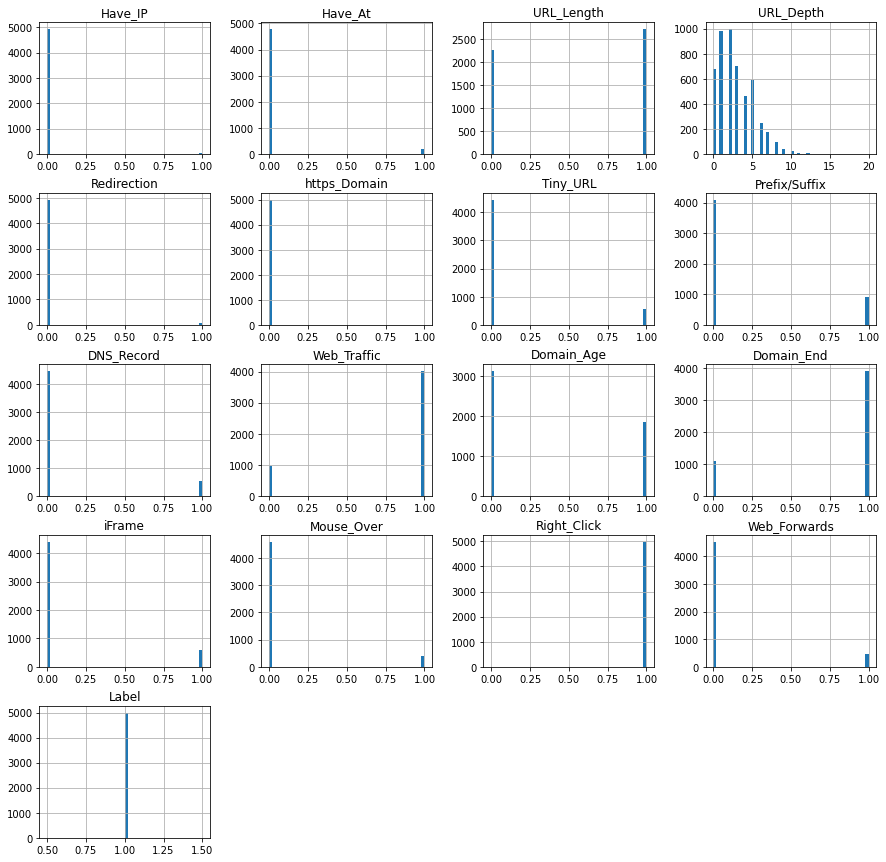

In [ ]:
#Plotting the data distribution
data0.hist(bins = 50,figsize = (15,15))
plt.show()

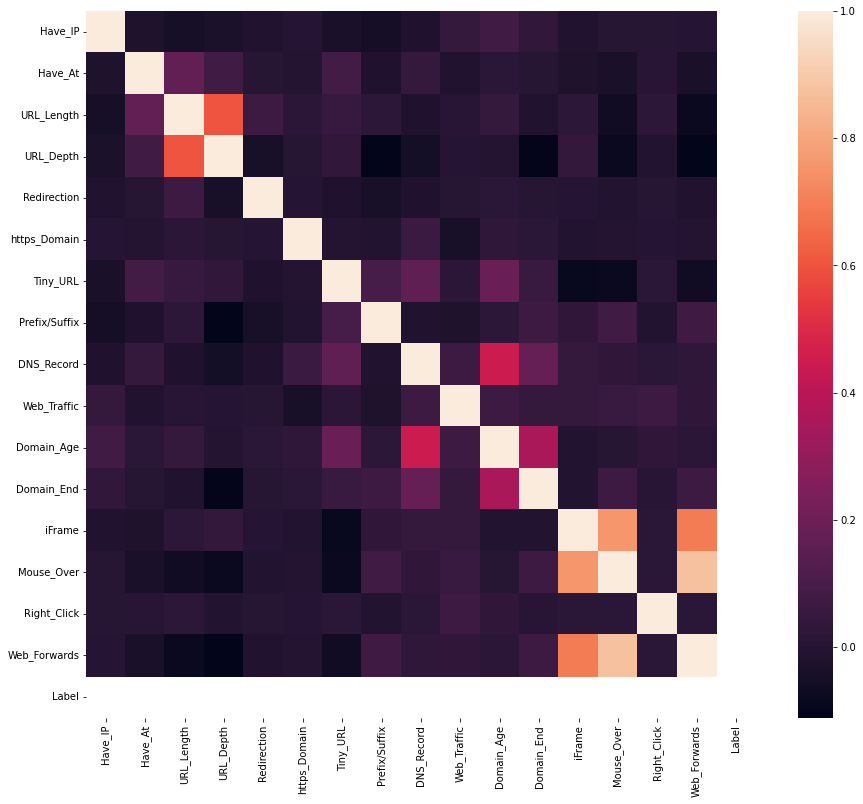

In [ ]:
#Correlation heatmap

plt.figure(figsize=(15,13))
sns.heatmap(data0.corr())
plt.show()

## **5. Data Preprocessing & EDA**
Here, we clean the data by applying data preprocesssing techniques and transform the data to use it in the models.

In [ ]:
data0.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,Tiny_URL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0000,5000.0
mean,0.011000,0.040200,0.546800,2.817200,0.013800,0.000400,0.111200,0.181200,0.105600,0.806400,0.371800,0.783000,0.119200,0.079400,0.998600,0.0926,1.0
std,0.104313,0.196448,0.497855,2.225213,0.116672,0.019998,0.314411,0.385222,0.307356,0.395159,0.483334,0.412244,0.324056,0.270389,0.037394,0.2899,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,1.0
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.0000,1.0
50%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.0000,1.0
75%,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.0000,1.0
max,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.0


The above obtained result shows that the most of the data is made of 0's & 1's except 'Domain' & 'URL_Depth' columns. The Domain column doesnt have any significance to the machine learning model training. So dropping the *'Domain'* column from the dataset. 

In [ ]:
#Dropping the Domain column
data = data0.drop(['Domain'], axis = 1).copy()

This leaves us with 16 features & a target column. The *'URL_Depth'* maximum value is 20. According to my understanding, there is no necessity to change this column.

In [ ]:
#checking the data for null or missing values
data.isnull().sum()

Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
Tiny_URL         0
Prefix/Suffix    0
DNS_Record       0
Web_Traffic      0
Domain_Age       0
Domain_End       0
iFrame           0
Mouse_Over       0
Right_Click      0
Web_Forwards     0
Label            0
dtype: int64

In the feature extraction file, the extracted features of legitmate & phishing url datasets are just concatenated without any shuffling. This resulted in top 5000 rows of legitimate url data & bottom 5000 of phishing url data. 

To even out the distribution while splitting the data into training & testing sets, we need to shuffle it. This even evades the case of overfitting while model training.

In [ ]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,Tiny_URL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,1,1,10,0,0,0,0,0,0,0,1,0,0,1,0,1
1,0,0,0,2,0,0,0,0,0,0,1,1,0,0,1,0,1
2,0,0,1,5,0,0,1,1,0,1,1,1,0,0,1,0,1
3,0,0,0,2,0,0,0,0,0,1,0,0,0,0,1,0,1
4,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1


From the above execution, it is clear that the data doesnot have any missing values.

By this, the data is throughly preprocessed & is ready for training.

## **6. Splitting the Data**

In [ ]:
# Sepratating & assigning features and target columns to X & y
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

((5000, 16), (5000,))

In [ ]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((4000, 16), (1000, 16))

## **7. Machine Learning Models & Training**

From the dataset above, it is clear that this is a supervised machine learning task. There are two major types of supervised machine learning problems, called classification and regression. 

This data set comes under classification problem, as the input URL is classified as phishing (1) or legitimate (0). The supervised machine learning models (classification) considered to train the dataset in this notebook are:
* Decision Tree
* Random Forest
* Multilayer Perceptrons
* XGBoost


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

### **7.1. Decision Tree Classifier**
 Decision trees are widely used models for classification and regression tasks. Essentially, they learn a hierarchy of if/else questions, leading to a decision. Learning a decision tree means learning the sequence of if/else questions that gets us to the true answer most quickly.
 
In the machine learning setting, these questions are called tests. 
To build a tree, the algorithm searches over all possible tests and finds the one that is most informative about the target variable.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 5) 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

**Performance Evaluation:**

In [ ]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 1.000
Decision Tree: Accuracy on test Data: 1.000


In [ ]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

**Storing the results:**

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

### **7.2. Random Forest Classifier**
Random forests for regression and classification are currently among the most widely used machine learning methods.A random forest is essentially a collection of decision trees, where each tree is slightly different from the others. The idea behind random forests is that each tree might do a relatively good job of predicting, but will likely overfit on part of the data.

In [ ]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=5)

# fit the model 
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [ ]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

**Performance Evaluation:**

In [ ]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 1.000
Random forest: Accuracy on test Data: 1.000


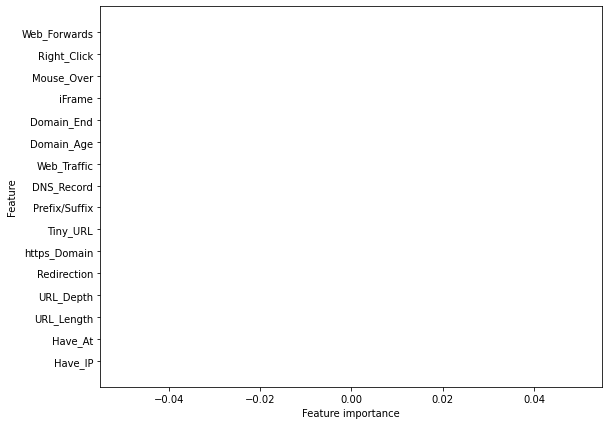

In [ ]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

**Storing the results:**

In [ ]:
#storing the results. The below mentioned order of parameter passing is important:
storeResults('Random Forest', acc_train_forest, acc_test_forest)

### **7.3. Multilayer Perceptrons (MLPs): Deep Learning**
Multilayer perceptrons (MLPs) are also known as (vanilla) feed-forward neural networks, or sometimes just neural networks. Multilayer perceptrons can be applied for both classification and regression problems.

MLPs can be viewed as generalizations of linear models that perform multiple stages of processing to come to a decision.

In [ ]:
# Multilayer Perceptrons model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))

# fit the model 
mlp.fit(X_train, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100])

In [ ]:
#predicting the target value from the model for the samples
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

**Performance Evaluation:**

In [ ]:
#computing the accuracy of the model performance
acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_test_mlp = accuracy_score(y_test,y_test_mlp)

print("Multilayer Perceptrons: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptrons: Accuracy on test Data: {:.3f}".format(acc_test_mlp))

Multilayer Perceptrons: Accuracy on training Data: 1.000
Multilayer Perceptrons: Accuracy on test Data: 1.000


**Storing the results:**

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Multilayer Perceptrons', acc_train_mlp, acc_test_mlp)

### **7.4. XGBoost Classifier**
XGBoost is one of the most popular machine learning algorithms these days. XGBoost stands for eXtreme Gradient Boosting. Regardless of the type of prediction task at hand; regression or classification. XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.

In [ ]:
#XGBoost Classification model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
#fit the model
xgb.fit(X_train, y_train)

XGBClassifier(learning_rate=0.4, max_depth=7)

In [ ]:
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

**Performance Evaluation:**

In [ ]:
#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 1.000
XGBoost : Accuracy on test Data: 1.000


## **7.5 Comparision of Models**
To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.

In [ ]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,1.0,1.0
1,Random Forest,1.0,1.0
2,Multilayer Perceptrons,1.0,1.0


In [ ]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,1.0,1.0
1,Random Forest,1.0,1.0
2,Multilayer Perceptrons,1.0,1.0


For the above comparision, it is clear that the XGBoost Classifier works well with this dataset.

So, saving the model for future use.

In [ ]:
# save XGBoost model to file
import pickle
pickle.dump(xgb, open("XGBoostClassifier.pickle.dat", "wb"))

**Testing the saved model:**

In [ ]:
# load model from file
loaded_model = pickle.load(open("XGBoostClassifier.pickle.dat", "rb"))
loaded_model

XGBClassifier(learning_rate=0.4, max_depth=7, missing=nan)